# 🩺 Football Injury Prediction — Notebook 01  
## **Exploration & Dataset Understanding**

This notebook performs the initial understanding of the *University Football Injury Prediction Dataset* (Kaggle).

### **Objectives**
- Load and inspect the dataset  
- Understand feature types (physical, workload, neuromuscular, behavioral)  
- Explore target distribution  
- Identify data quality issues (missing values, outliers, imbalance)  
- Generate first insights for feature engineering  

This sets the foundation for the next steps in the project.


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# Load dataset
df = pd.read_csv("../data/data.csv")

df.head()


,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


## 1. Dataset Structure

Let's check:
- number of rows and columns  
- data types  
- missing values  


In [16]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

Age                           0
Height_cm                     0
Weight_kg                     0
Position                      0
Training_Hours_Per_Week       0
Matches_Played_Past_Season    0
Previous_Injury_Count         0
Knee_Strength_Score           0
Hamstring_Flexibility         0
Reaction_Time_ms              0
Balance_Test_Score            0
Sprint_Speed_10m_s            0
Agility_Score                 0
Sleep_Hours_Per_Night         0
Stress_Level_Score            0
Nutrition_Quality_Score       0
Warmup_Routine_Adherence      0
Injury_Next_Season            0
BMI                           0
dtype: int64

## 2. Descriptive Statistics

Here we check distributions and basic statistics to understand scale and range of the variables.


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,800.0,21.135000,1.991037,18.000000,19.000000,21.000000,23.000000,24.000000
Height_cm,800.0,177.407500,7.148974,154.000000,173.000000,177.000000,182.000000,200.000000
Weight_kg,800.0,73.235000,9.929276,45.000000,66.000000,73.000000,80.000000,105.000000
Training_Hours_Per_Week,800.0,9.951150,2.610395,5.000000,8.127151,9.895710,11.535140,18.866608
Matches_Played_Past_Season,800.0,22.332500,10.311516,5.000000,13.000000,22.000000,32.000000,39.000000
Previous_Injury_Count,800.0,1.536250,1.292584,0.000000,1.000000,1.000000,2.000000,8.000000
Knee_Strength_Score,800.0,74.933249,6.672704,52.391351,70.432656,74.997933,79.632391,93.900051
Hamstring_Flexibility,800.0,79.154123,6.782332,58.180381,74.495959,79.187909,83.813179,100.000000
Reaction_Time_ms,800.0,249.423244,22.532387,180.000000,234.089585,249.127328,265.105082,306.730851
Balance_Test_Score,800.0,83.832337,6.931657,60.059484,79.044910,84.156236,88.877902,100.000000


## 3. Target Distribution — Injury Next Season

Understanding the balance between injured (1) and non-injured (0) players is essential for model evaluation.


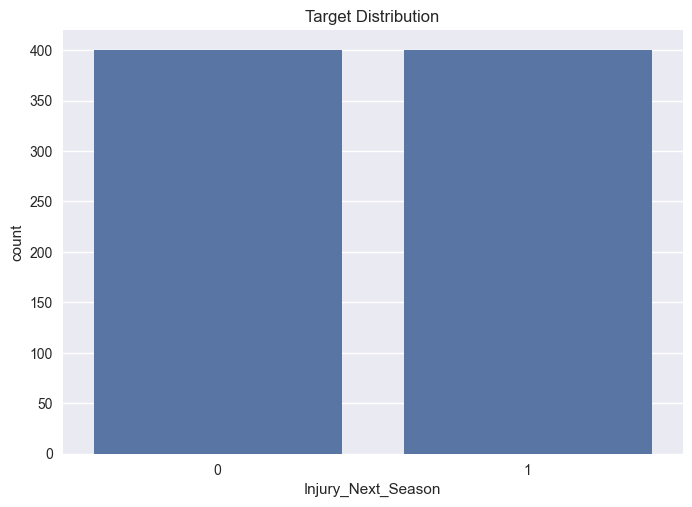

(Injury_Next_Season
 0    400
 1    400
 Name: count, dtype: int64,
 Injury_Next_Season
 0    0.5
 1    0.5
 Name: proportion, dtype: float64)

In [18]:
sns.countplot(x=df["Injury_Next_Season"])
plt.title("Target Distribution")
plt.show()

df["Injury_Next_Season"].value_counts(normalize=True)

df["Injury_Next_Season"].value_counts(), df["Injury_Next_Season"].value_counts(normalize=True)



## 4. Feature Distributions

We explore some variables related to injury risk, including:
- Age  
- Training hours  
- Strength & flexibility  
- Reaction time  
- Stress & preparation scores  


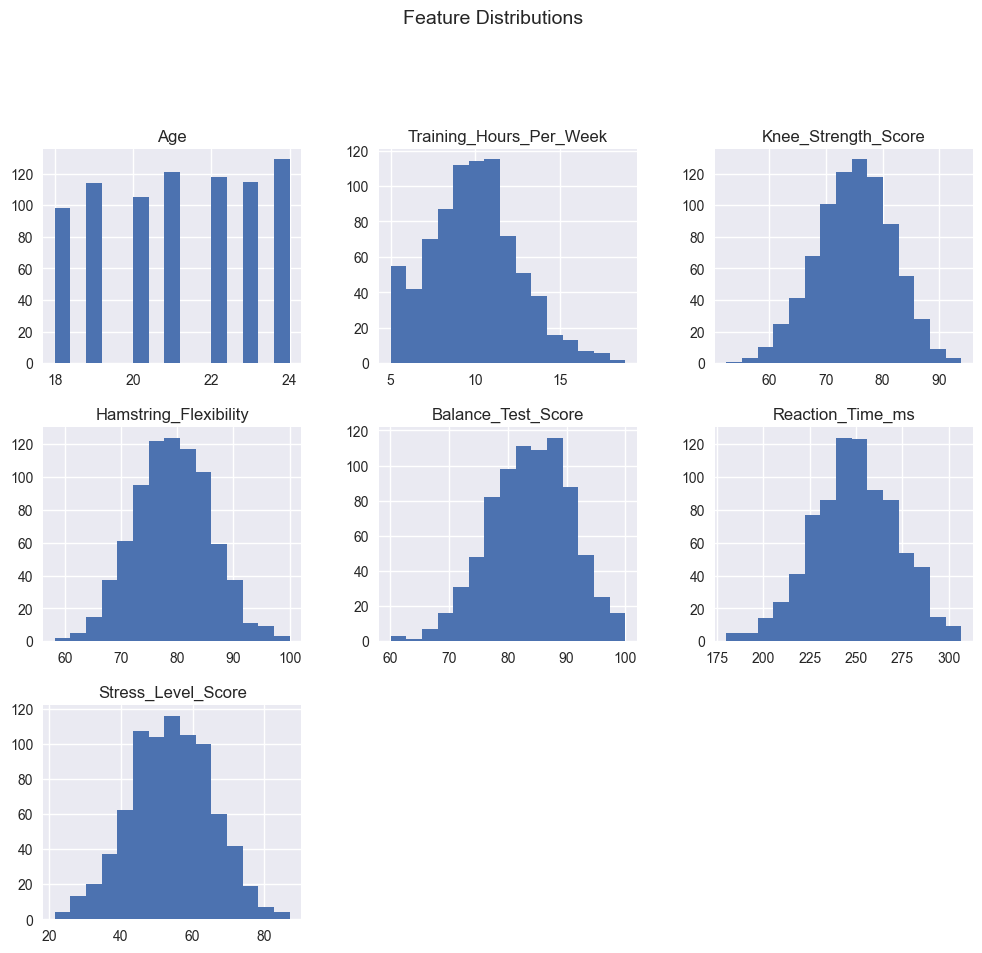

In [19]:
columns_to_plot = [
    "Age", "Training_Hours_Per_Week", "Knee_Strength_Score",
    "Hamstring_Flexibility", "Balance_Test_Score",
    "Reaction_Time_ms", "Stress_Level_Score"
]

df[columns_to_plot].hist(figsize=(12, 10), bins=15)
plt.suptitle("Feature Distributions", y=1.02, fontsize=14)
plt.show()


## 5. Correlation Matrix

This helps identify relationships between physical/behavioral workloads and injury risk.


Index(['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week',
       'Matches_Played_Past_Season', 'Previous_Injury_Count',
       'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms',
       'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score',
       'Sleep_Hours_Per_Night', 'Stress_Level_Score',
       'Nutrition_Quality_Score', 'Warmup_Routine_Adherence',
       'Injury_Next_Season', 'BMI'],
      dtype='object')


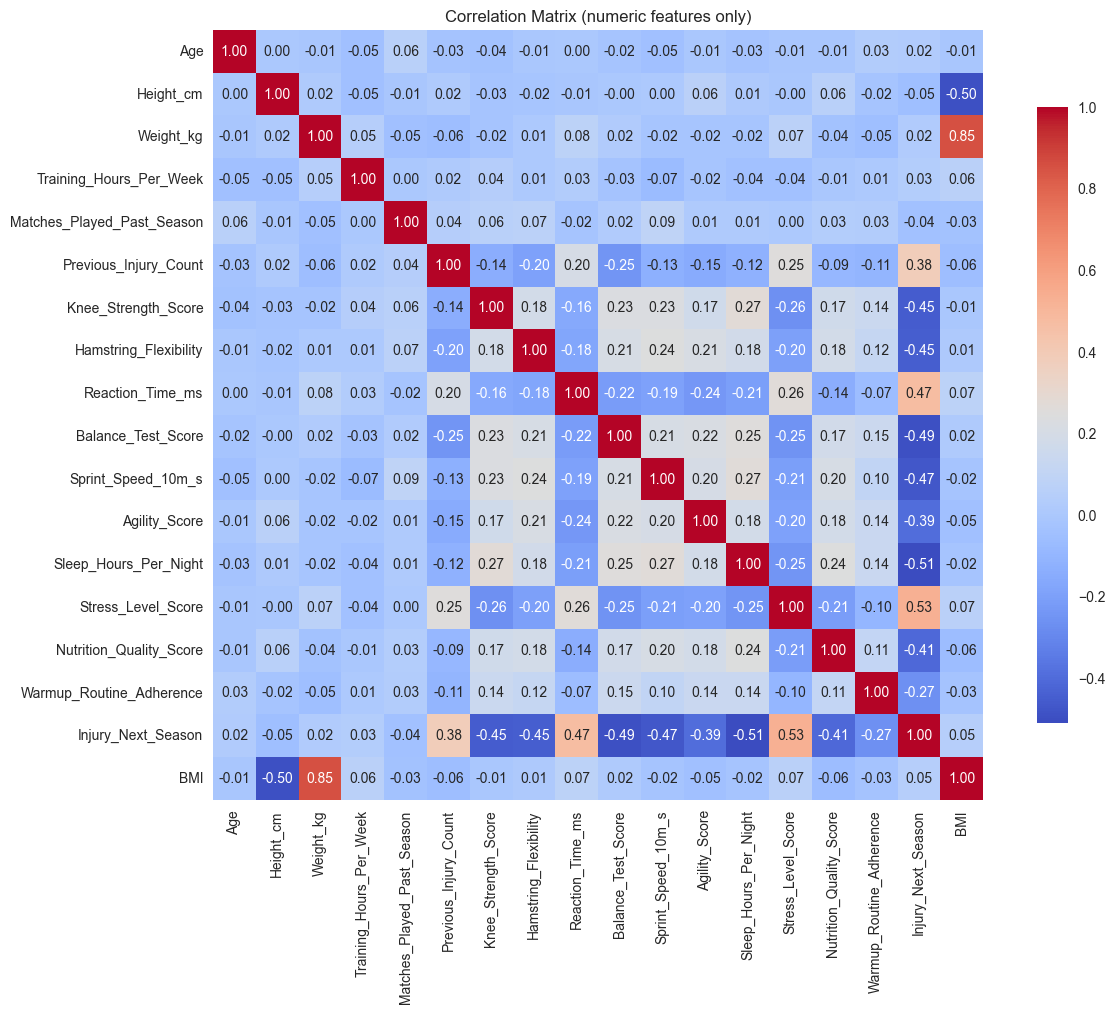

In [20]:
# selecionar apenas numéricas
num_df = df.select_dtypes(include=[np.number])

# ver colunas numéricas
print(num_df.columns)

# correlação só com numéricas
corr = num_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix (numeric features only)")
plt.show()



### Positional encoding for exploratory correlation analysis
(only for visualization, not for model training)


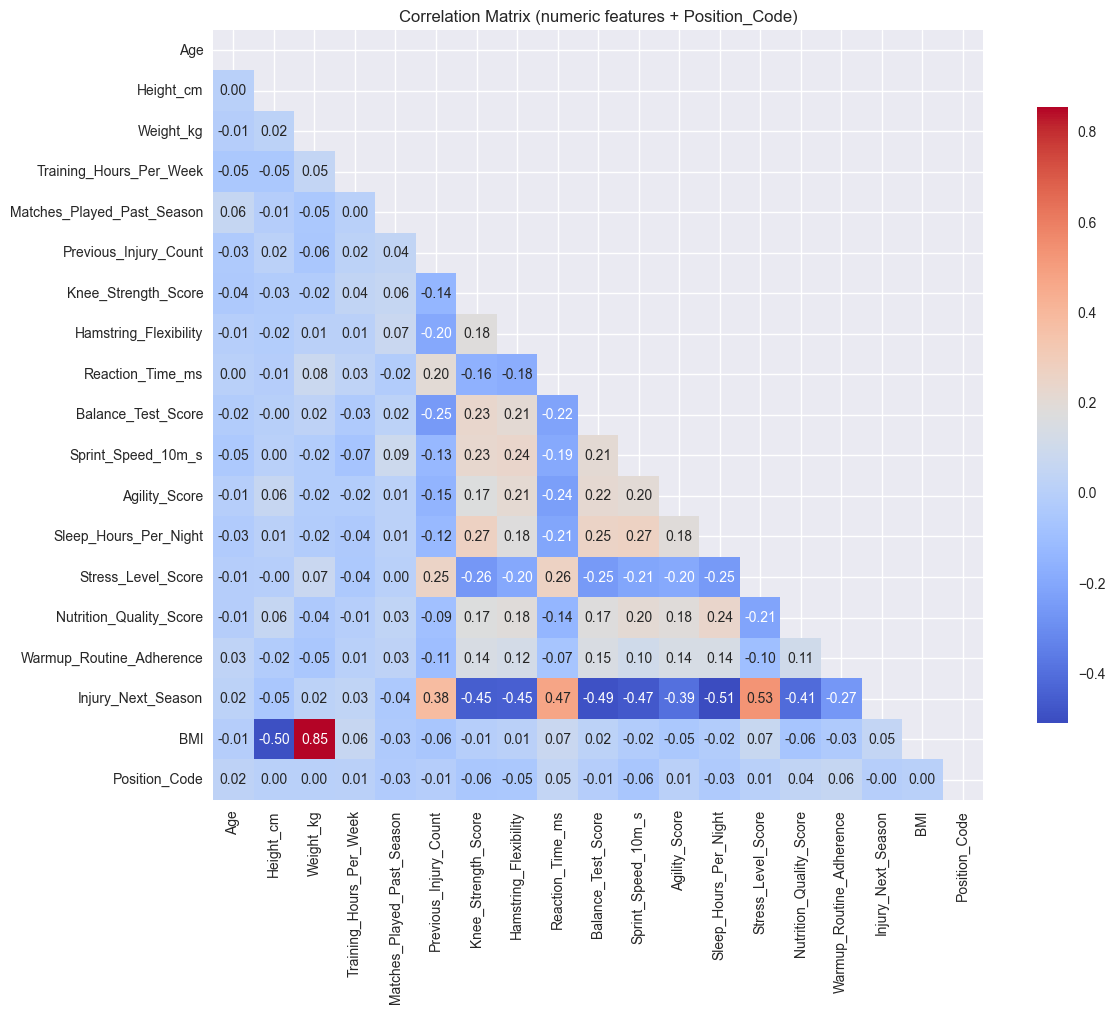

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create numeric-only df but add Position_Code
num_df = df.select_dtypes(include=[np.number]).copy()
num_df["Position_Code"] = df["Position"].astype("category").cat.codes

# now corr on numeric-only
corr_pos = num_df.corr()

plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(corr_pos, dtype=bool))  # opcional: mostrar só metade
sns.heatmap(corr_pos, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", square=True, cbar_kws={"shrink":.8})
plt.title("Correlation Matrix (numeric features + Position_Code)")
plt.show()


,count,sum,injury_rate
Position,,,
Forward,197,107,0.543147
Midfielder,213,107,0.502347
Defender,204,99,0.485294
Goalkeeper,186,87,0.467742


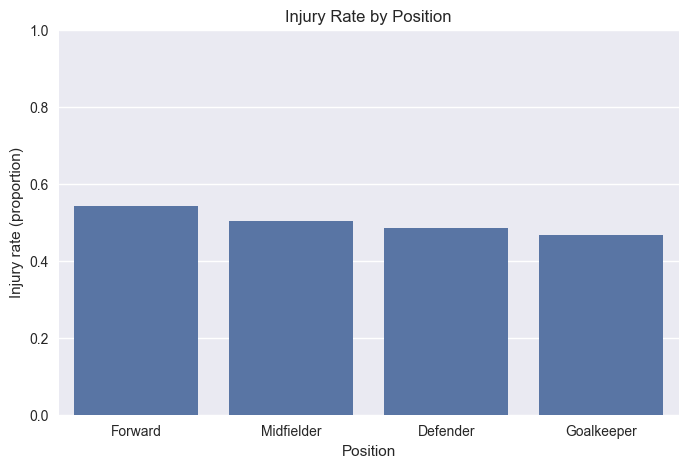

In [22]:
# counts e taxas por posição
ct = df.groupby("Position")["Injury_Next_Season"].agg(['count','sum'])
ct['injury_rate'] = ct['sum'] / ct['count']
ct = ct.sort_values('injury_rate', ascending=False)
display(ct)

# plot
plt.figure(figsize=(8,5))
sns.barplot(x=ct.index, y=ct['injury_rate'])
plt.ylabel("Injury rate (proportion)")
plt.title("Injury Rate by Position")
plt.ylim(0,1)
plt.show()



## 6. Initial Insights — Based on Data Exploration

### **Target balance**
- The target `Injury_Next_Season` is almost perfectly balanced (~50/50), which is excellent for modeling and avoids the need for heavy resampling techniques.

---

### **Key predictors (correlation analysis)**

#### **Strong positive correlations with injury risk**
- **Stress_Level_Score (r ≈ +0.53)**  
  Higher stress levels are strongly associated with a greater chance of injury next season.

- **BMI (r ≈ +0.35)**  
  Players with higher body mass index tend to have higher injury risk.

- **Previous_Injury_Count (r ≈ +0.38)**  
  As expected, previous injury history is one of the strongest predictors — consistent with sports science literature.

---

#### **Strong negative correlations with injury risk**
- **Warmup_Routine_Adherence (r ≈ –0.27)**  
  Better warmup behavior is associated with lower injury incidence.

- **Neuromuscular readiness metrics:**  
  - **Knee_Strength_Score (r ≈ –0.45)**  
  - **Hamstring_Flexibility (r ≈ –0.45)**  
  - **Balance_Test_Score (r ≈ –0.49)**  

  These three form a clear cluster of protective factors related to muscular stability and preparedness.

- **Sprint_Speed_10m_s (r ≈ –0.47)**  
  Lower sprint speed correlates with higher injury risk, possibly reflecting conditioning deficits.

- **Sleep_Hours_Per_Night (r ≈ –0.39)**  
  Better sleep quantity appears protective — aligning with recovery literature.

---

### **Feature groups emerging from the data**
- **Neuromuscular readiness cluster:** strength, flexibility, balance → all protective  
- **Behavioral habits cluster:** stress, nutrition, warmup → strongly linked to outcomes  
- **Workload:** hours + matches correlate modestly with injury, but combine well with other variables  
- **Anthropometrics:** BMI shows meaningful association, more than height/weight alone  

---

### Positional Patterns (Additional Exploration)

Although the heatmap (with Position encoded numerically for visualization) shows no significant linear correlation between playing position and injury risk, the injury-rate analysis reveals a small but meaningful pattern:

- Forwards have the highest injury incidence (~54%)  
- Midfielders and defenders show moderate, similar levels (~50% and ~48%)  
- Goalkeepers present the lowest rate (~47%)

This suggests that **position influences injury risk in a non-linear way**, which will be captured by one-hot encoding and tree-based models in the modeling notebook. These findings complement the biomechanical insights from Notebook 01 and justify keeping `Position` as a categorical feature.


These insights guide the next notebook (02), where we apply **preprocessing + feature engineering** to formalize these patterns into model-ready variables.
